### 1. Data Understanding and Exploration

In [1]:
#Importing the required libraries and understanding the size, attribute names etc.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
np.random.seed(101)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset in 'house'
house = pd.read_csv("train.csv", na_values="NAN")

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Summary of the dataset : 1460 rows, 81 columns

# EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

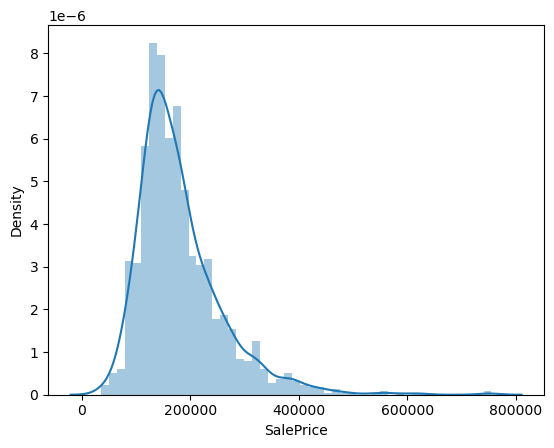

In [7]:
sns.distplot(house['SalePrice'])

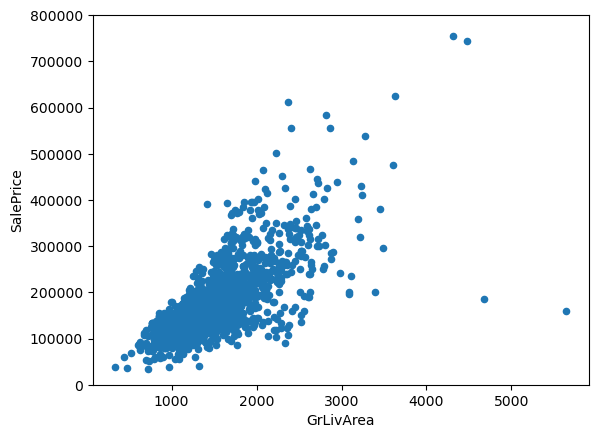

In [8]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

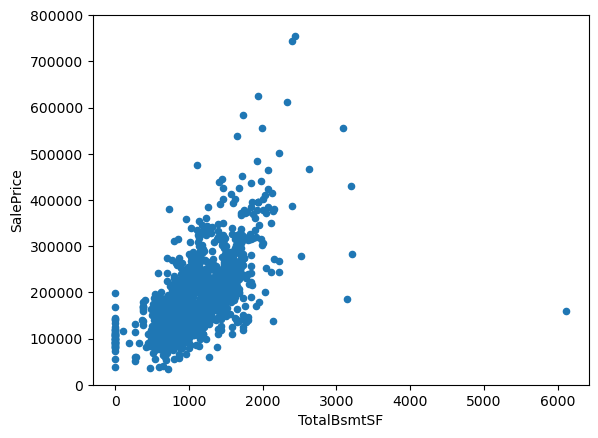

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<AxesSubplot:xlabel='SalePrice'>

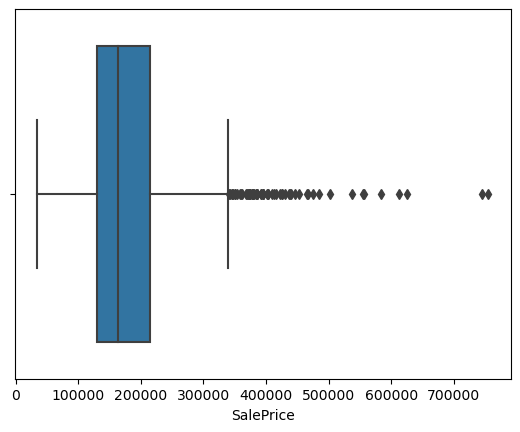

In [10]:
sns.boxplot(data['SalePrice'])

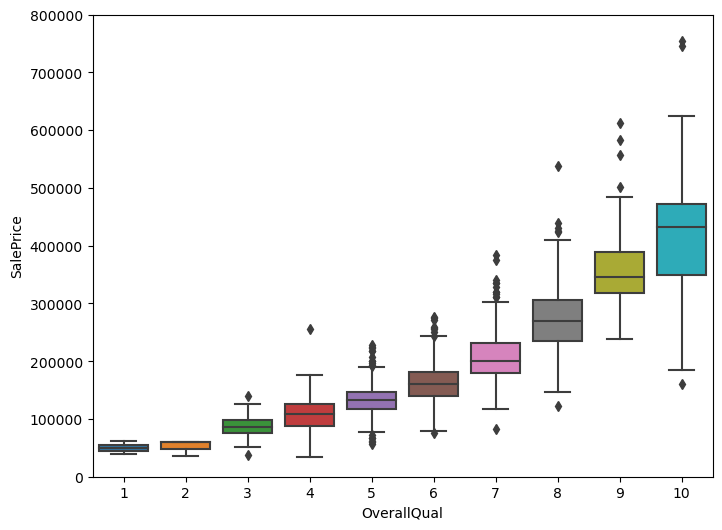

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

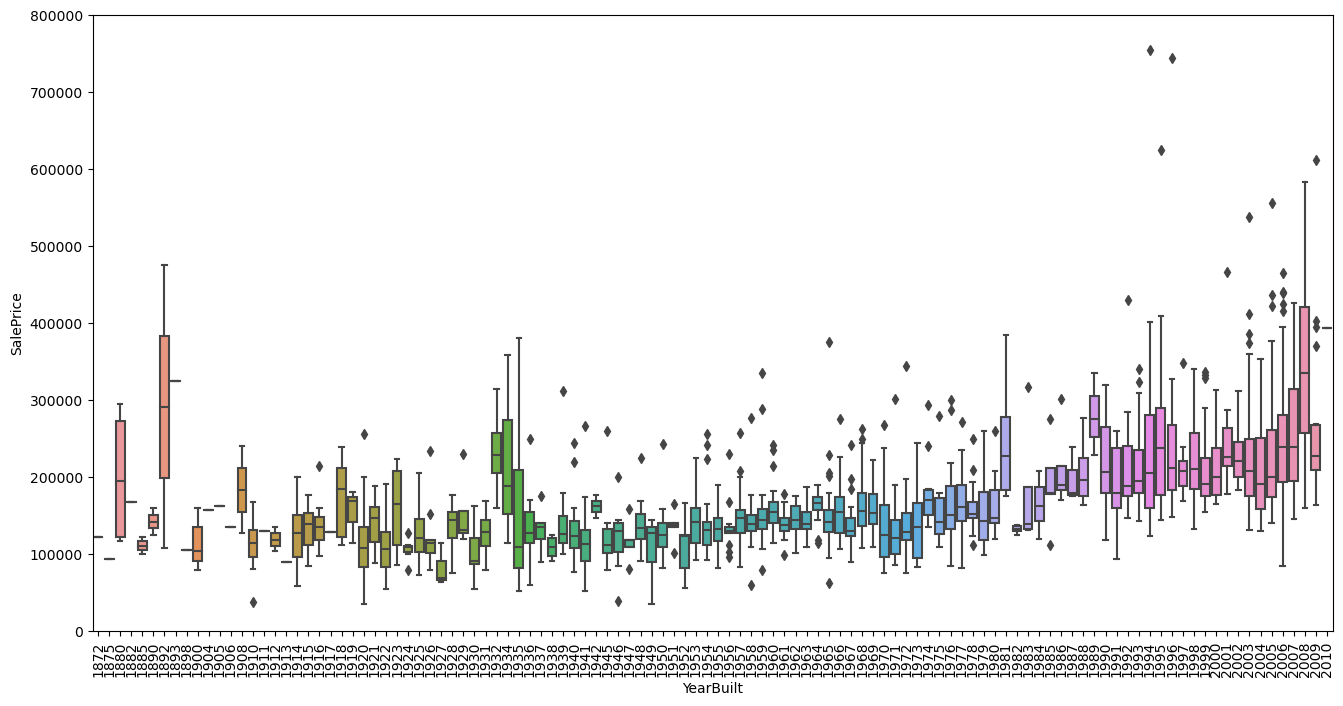

In [12]:
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

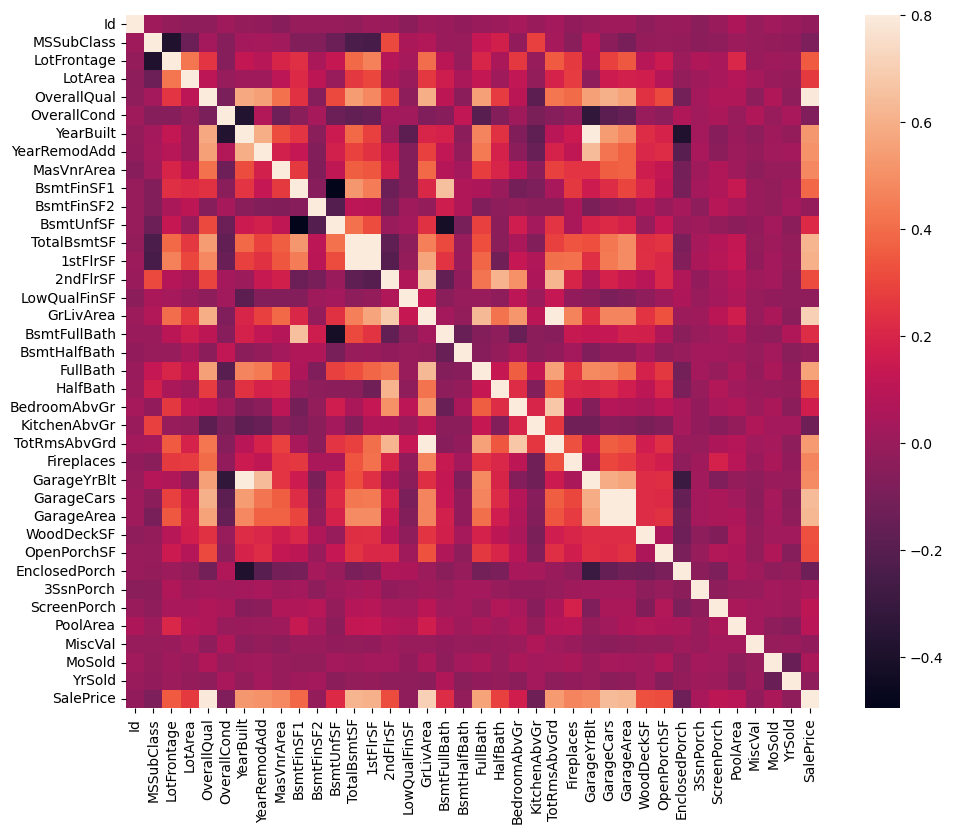

In [13]:
#correlation matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

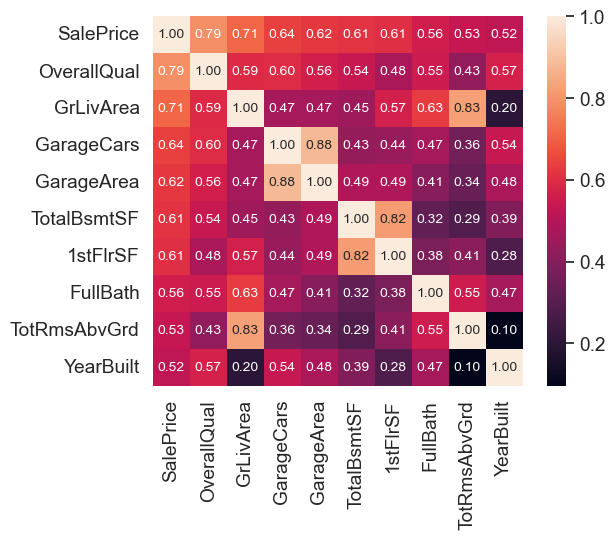

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

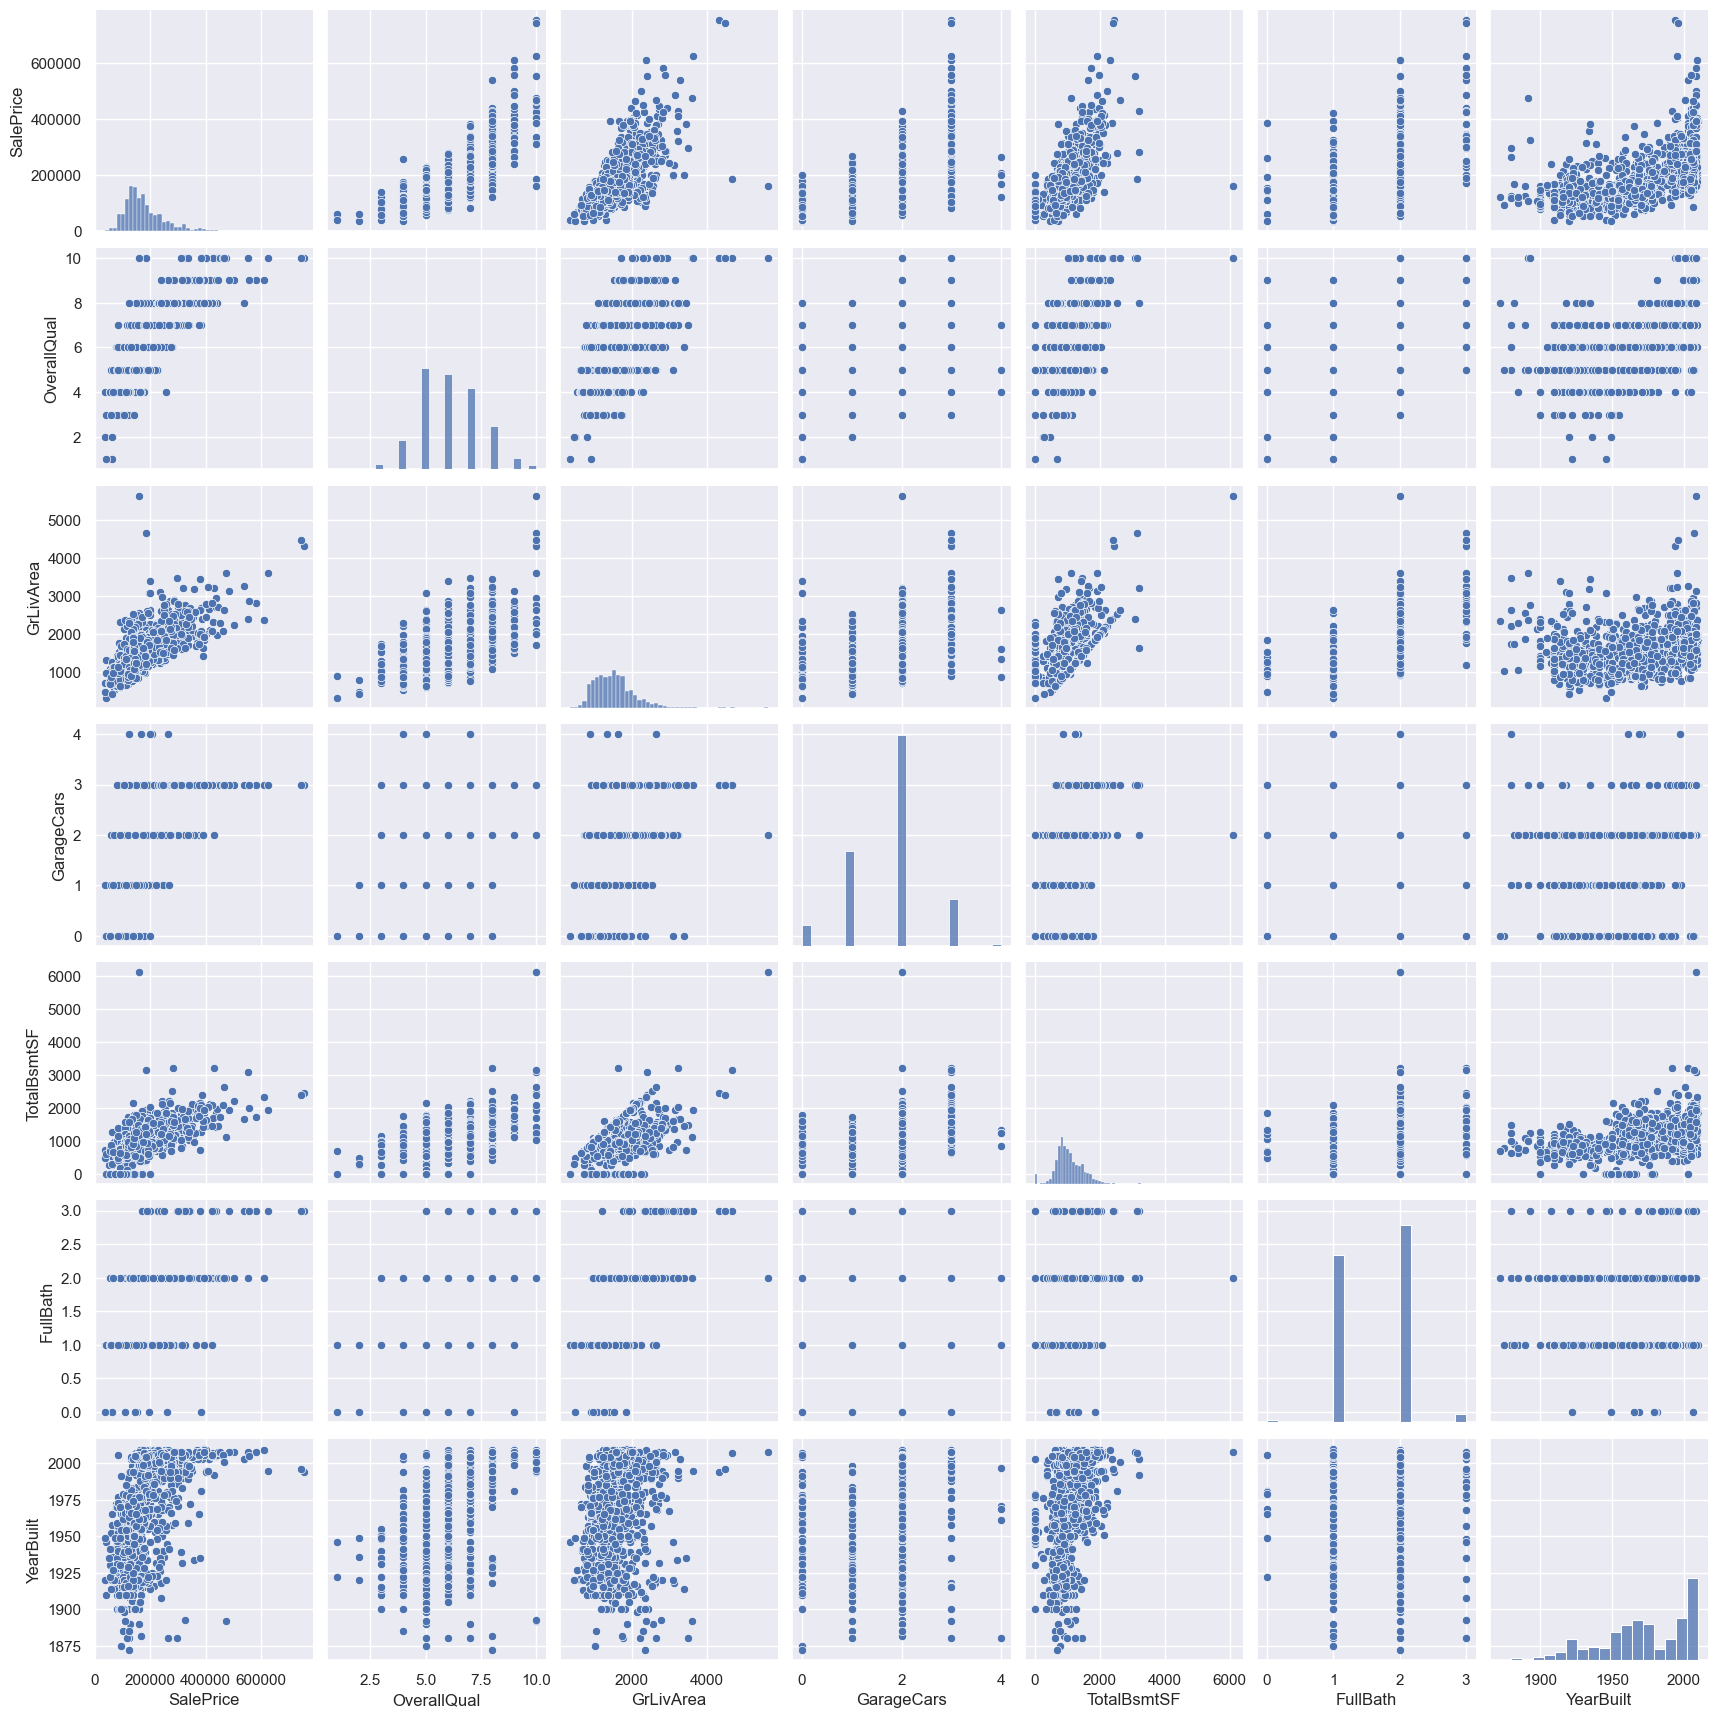

In [209]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

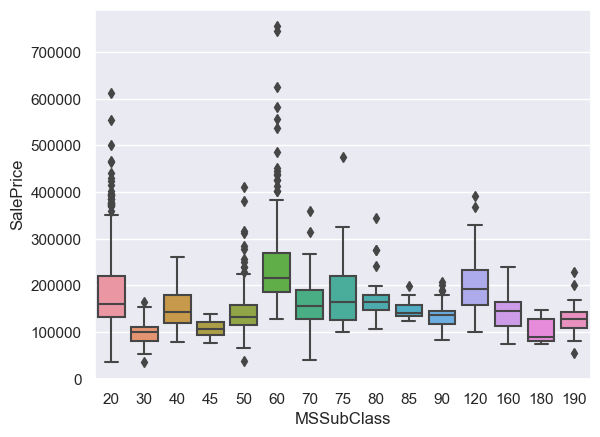

In [218]:
sns.boxplot(data=house,y='SalePrice',x="MSSubClass")

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

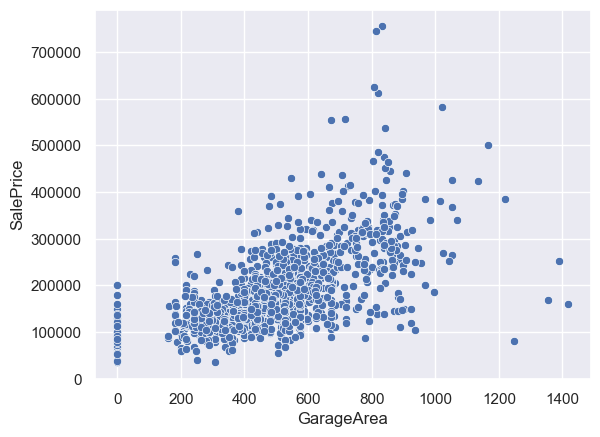

In [223]:
sns.scatterplot(data=house,y='SalePrice',x="GarageArea")

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

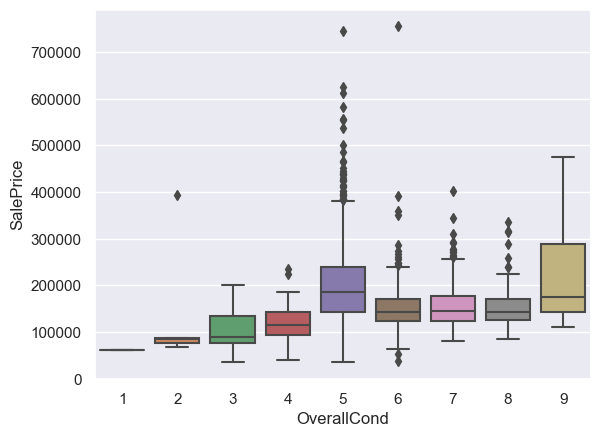

In [220]:
sns.boxplot(data=house,y='SalePrice',x="OverallCond")

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

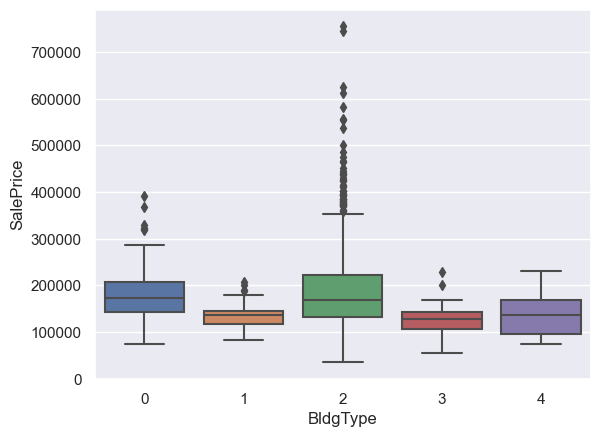

In [224]:
sns.boxplot(data=house,y='SalePrice',x="BldgType")

In [228]:
house.BldgType.value_counts()

2    1219
0     114
1      52
4      43
3      31
Name: BldgType, dtype: int64

# 2. Data Cleaning

In [16]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## Imputing Null Values

For numerical imputing, we will fill missing values with median. For categorical imputing, we will fill the missing values with the most common term that appeared from the entire column. 

### Places Where NaN Means Something
We see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [17]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [18]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [20]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [21]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.

In [22]:
house.drop("LotFrontage", axis=1, inplace=True)

In [23]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [24]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [25]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


Now that only one row has a null entry, we will drop the row.

In [26]:
house.dropna(inplace=True)

In [27]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [28]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Determining the data type of all features remaining

In [29]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [30]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [31]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [32]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


These are all the numerical features in our data.

In [33]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


These are all the caregorical features in our data.

# Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

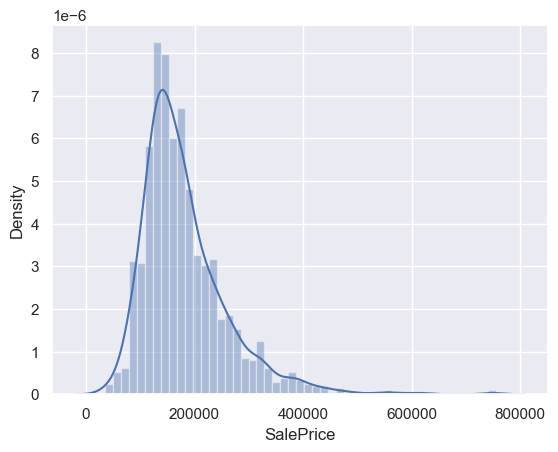

In [34]:
sns.distplot(house["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

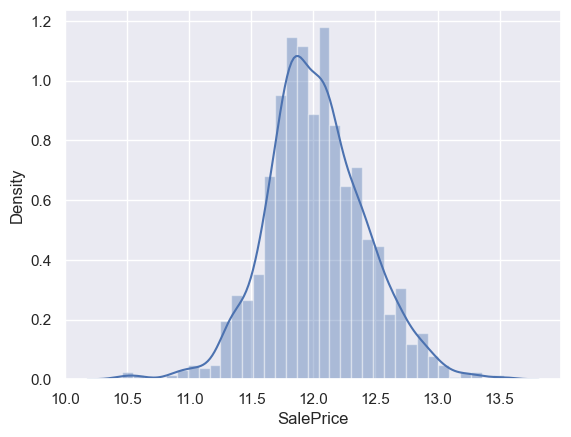

In [35]:
sns.distplot(np.log(house["SalePrice"]))

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Since Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [36]:
house["TransformedPrice"] = np.log(house["SalePrice"])

In [37]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [38]:
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [39]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,1,8450,1,1,0,0,1,2,...,3,1,3,0,2,2008,2,0,208500,12.247694
1,2,20,1,9600,1,1,0,0,1,3,...,3,1,3,0,5,2007,2,0,181500,12.109011
2,3,60,1,11250,1,1,2,0,1,2,...,3,1,3,0,9,2008,2,0,223500,12.317167
3,4,70,1,9550,1,1,2,0,1,4,...,3,1,3,0,2,2006,2,1,140000,11.849398
4,5,60,1,14260,1,1,2,0,1,3,...,3,1,3,0,12,2008,2,0,250000,12.429216


# Model Building

Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [160]:
X = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = house["TransformedPrice"]

In [161]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=101)

In [162]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9093013844886687
Testing R2
0.7621680916359995


In [163]:
#Sample Lasso regression model 'la'
la = Lasso(alpha=0.002)
la.fit(X_train,y_train)
print("Training R2")
print(la.score(X_train,y_train))
print("Testing R2")
print(la.score(X_test,y_test))

Training R2
0.903781598843892
Testing R2
0.7787576172428026


In [164]:
la.coef_

array([-5.35463599e-04,  1.86975326e-02,  2.54627504e-06,  0.00000000e+00,
        0.00000000e+00,  8.55582092e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.90433609e-03,  6.70334166e-03,
        8.10953551e-02, -1.00812289e-02,  0.00000000e+00,  6.77686234e-02,
        4.87010339e-02,  3.06833767e-03,  8.97891280e-04,  0.00000000e+00,
       -0.00000000e+00,  4.05617784e-04, -0.00000000e+00, -6.65397188e-03,
        1.68143012e-05, -0.00000000e+00,  0.00000000e+00,  1.48068455e-02,
        7.58479200e-03, -0.00000000e+00, -1.24596971e-02, -1.12257297e-03,
        1.46760410e-04, -4.71950193e-03,  1.31633793e-04,  5.04165755e-05,
        3.70816414e-05,  0.00000000e+00,  1.02494829e-02, -0.00000000e+00,
       -0.00000000e+00,  2.05254763e-04,  2.26014040e-04,  1.90664106e-04,
        2.78029707e-05,  3.91217862e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.02268320e-03,
        5.10016081e-03,  

In [165]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [166]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

### Lasso

In [167]:
# Applying Lasso 
lasso = Lasso()

# cross validation as model_cv_l1
folds = 5
model_cv_l1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l1.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [168]:
cv_results = pd.DataFrame(model_cv_l1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022930,0.010156,0.003192,0.000746,0.0,{'alpha': 1e-08},-0.094081,-0.096982,-0.096084,-0.104371,...,-0.096074,0.005016,7,-0.081249,-0.078978,-0.081886,-0.083928,-0.082666,-0.081741,0.001645
1,0.023944,0.011834,0.003191,0.000746,0.0,{'alpha': 1e-07},-0.094081,-0.096982,-0.096083,-0.103820,...,-0.095963,0.004836,6,-0.081249,-0.078978,-0.081886,-0.083929,-0.082666,-0.081742,0.001646
2,0.019732,0.008215,0.002404,0.000480,0.000001,{'alpha': 1e-06},-0.094079,-0.096983,-0.096076,-0.098306,...,-0.094859,0.003304,5,-0.081250,-0.078978,-0.081887,-0.083946,-0.082666,-0.081745,0.001650
3,0.011561,0.001619,0.002601,0.000479,0.00001,{'alpha': 1e-05},-0.094057,-0.096995,-0.096009,-0.091587,...,-0.093500,0.002969,4,-0.081262,-0.078983,-0.081895,-0.083955,-0.082662,-0.081752,0.001650
4,0.010372,0.001850,0.002393,0.000489,0.0001,{'alpha': 0.0001},-0.093933,-0.097104,-0.095385,-0.091371,...,-0.093336,0.002912,3,-0.081448,-0.079032,-0.082054,-0.083793,-0.082776,-0.081821,0.001598


In [169]:
cv_results[cv_results['mean_test_score']==cv_results['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.007979,1.907349e-07,0.002194,0.000399,0.001,{'alpha': 0.001},-0.093698,-0.097427,-0.092986,-0.091092,...,-0.092705,0.003006,1,-0.082488,-0.07935,-0.083285,-0.083586,-0.083248,-0.082391,0.001563


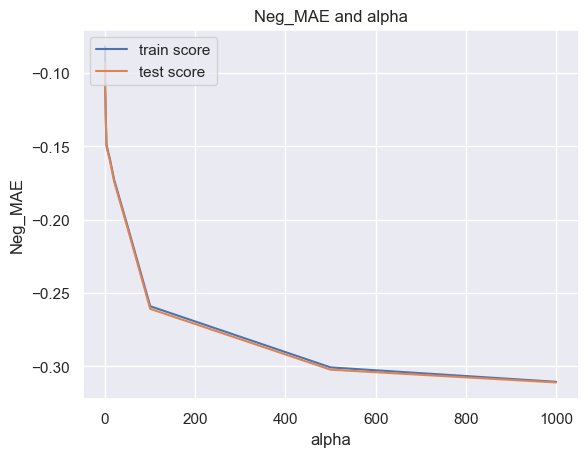

In [170]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
#cv_results = cv_results[cv_results['param_alpha']<=0.05]
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg_MAE')

plt.title("Neg_MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [171]:
model_cv_l1.best_params_

{'alpha': 0.001}

In [172]:
# Lasso for best param in 'lasso_l1'
alpha = 0.001
lasso_l1 = Lasso(alpha=alpha)
        
lasso_l1.fit(X_train, y_train) 

y_pred_train = lasso_l1.predict(X_train)
y_pred_test = lasso_l1.predict(X_test)

r2_train_l1 = r2_score(y_train, y_pred_train)
print(r2_train_l1)
r2_test_l1 = r2_score(y_test, y_pred_test)
print(r2_test_l1)

0.9061785466123433
0.7813725781863667


In [173]:
lasso_l1.coef_

array([-5.13752390e-04,  2.26093300e-02,  2.51866600e-06,  1.45528914e-02,
        0.00000000e+00,  9.50765903e-03, -1.41518093e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.91399529e-03,  6.43250848e-03,
        9.21366029e-02, -1.26261169e-02,  1.32195528e-03,  6.68965180e-02,
        5.05731478e-02,  2.91473374e-03,  8.58805962e-04,  0.00000000e+00,
       -0.00000000e+00,  2.87325379e-04, -1.49563637e-06, -7.93914122e-03,
        2.20026194e-05, -0.00000000e+00,  1.20915563e-02,  1.57965694e-02,
        9.88669330e-03, -5.98459277e-03, -1.37278470e-02, -1.58394832e-03,
        1.36368891e-04, -6.28167578e-03,  1.31577220e-04,  4.66163094e-05,
        3.42847095e-05,  0.00000000e+00,  1.04063005e-02, -5.47554684e-03,
       -0.00000000e+00,  2.06842874e-04,  2.16773442e-04,  1.85435490e-04,
        2.63880291e-05,  1.27789306e-02, -2.59989036e-03,  6.13495952e-03,
        5.95494089e-03, -0.00000000e+00, -1.54113934e-02,  6.28308574e-03,
        6.87381393e-03,  

In [175]:
model_param = list(lasso_l1.coef_)
model_param.insert(0,lasso_l1.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(val) for val in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,MSSubClass,11.295741,11.295741
13,BldgType,0.092137,0.092137
16,OverallCond,0.066897,0.066897
17,YearBuilt,0.050573,0.050573
60,GarageArea,0.026148,0.026148
54,Fireplaces,0.025331,0.025331
55,FireplaceQu,0.023103,0.023103
2,LotArea,0.022609,0.022609
28,BsmtQual,0.015797,0.015797
51,KitchenQual,-0.015411,0.015411


### Ridge

In [176]:
# Applying Ridge
ridge = Ridge()

# cross validation as model_cv_l2
folds = 5
model_cv_l2 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv_l2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
cv_results = pd.DataFrame(model_cv_l2.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009177,1.463302e-03,0.003390,0.001017,0.0,{'alpha': 1e-08},-0.094081,-0.096982,-0.096084,-0.109646,...,-0.097129,0.006865,32,-0.081249,-0.078978,-0.081886,-0.083911,-0.082666,-0.081738,0.001641
1,0.006175,1.468354e-03,0.002588,0.000781,0.0,{'alpha': 1e-07},-0.094081,-0.096982,-0.096084,-0.109644,...,-0.097128,0.006864,31,-0.081249,-0.078978,-0.081886,-0.083911,-0.082666,-0.081738,0.001641
2,0.007180,1.716394e-03,0.002800,0.000403,0.000001,{'alpha': 1e-06},-0.094081,-0.096982,-0.096084,-0.109637,...,-0.097127,0.006862,30,-0.081249,-0.078978,-0.081886,-0.083911,-0.082666,-0.081738,0.001641
3,0.006383,1.353401e-03,0.002194,0.000399,0.00001,{'alpha': 1e-05},-0.094081,-0.096982,-0.096084,-0.109568,...,-0.097113,0.006836,29,-0.081249,-0.078978,-0.081886,-0.083911,-0.082666,-0.081738,0.001641
4,0.004986,2.431402e-07,0.002194,0.000399,0.0001,{'alpha': 0.0001},-0.094081,-0.096982,-0.096083,-0.108896,...,-0.096979,0.006592,27,-0.081249,-0.078978,-0.081886,-0.083913,-0.082666,-0.081738,0.001642


In [178]:
cv_results[cv_results['mean_test_score']==cv_results['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
29,0.005584,0.000489,0.002593,0.000798,100,{'alpha': 100},-0.092511,-0.094247,-0.093286,-0.089421,...,-0.091511,0.002354,1,-0.082258,-0.079721,-0.083517,-0.083573,-0.08326,-0.082466,0.001452


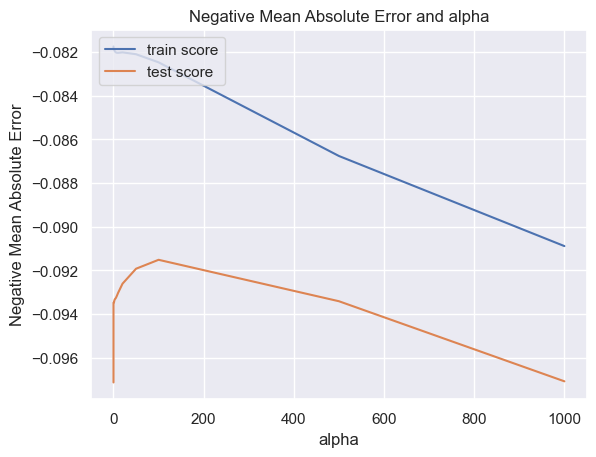

In [179]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [180]:
model_cv_l2.best_params_["alpha"]

100

In [181]:
#Ridge for best param in 'Ridge_l2'
alpha=100
ridge_l2 = Ridge(alpha=alpha)

ridge_l2.fit(X_train, y_train)

Ridge(alpha=100)

In [182]:
y_pred_train = ridge_l2.predict(X_train)
y_pred_test = ridge_l2.predict(X_test)

r2_train_l2 = r2_score(y_train, y_pred_train)
print(r2_train_l2)

r2_test_l2 = r2_score(y_test, y_pred_test)
print(r2_test_l2)

0.9041810023736286
0.7903025674749624


In [183]:
ridge_l2.coef_

array([-5.09698237e-04,  1.96564846e-02,  2.36678423e-06,  9.77616659e-03,
        3.51056383e-03,  9.57318914e-03, -3.12266781e-03,  9.65425484e-04,
        5.54395786e-04, -3.76678017e-03,  2.14779872e-03,  8.75027454e-03,
        4.78050812e-02, -1.20637585e-02,  2.02801096e-03,  5.84491199e-02,
        4.65347792e-02,  2.97720617e-03,  1.04325827e-03, -7.83877324e-04,
        8.34437136e-04,  5.92438042e-04, -3.54460754e-04, -8.76034439e-03,
        2.38678611e-05, -5.30618045e-03,  8.71423322e-03,  1.47672119e-02,
        1.07120673e-02, -1.12558599e-02, -1.42067670e-02, -2.18637015e-03,
        6.61325976e-05, -6.26522738e-03,  6.12456693e-05, -2.27107967e-05,
        1.04667471e-04,  1.76747823e-03,  1.04746209e-02, -1.08715732e-02,
       -9.03116614e-04,  7.06642898e-05,  7.85347740e-05,  1.25650699e-05,
        1.61764133e-04,  1.14350934e-02, -6.95842534e-03,  7.93187138e-03,
        8.77806398e-03,  4.61363068e-04, -1.18361356e-02,  6.82329966e-03,
        8.96240955e-03,  

In [184]:
ridge_l2.intercept_

11.752913393065546

In [185]:
model_param = list(ridge_l2.coef_)
model_param.insert(0,ridge_l2.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param,(abs(val) for val in model_param))))
ridge_coef.columns = ['Feature','Coef','mod']
ridge_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,MSSubClass,11.752913,11.752913
16,OverallCond,0.058449,0.058449
13,BldgType,0.047805,0.047805
17,YearBuilt,0.046535,0.046535
54,Fireplaces,0.022243,0.022243
2,LotArea,0.019656,0.019656
60,GarageArea,0.018321,0.018321
55,FireplaceQu,0.018260,0.018260
28,BsmtQual,0.014767,0.014767
31,BsmtFinType1,-0.014207,0.014207


The company wants to know:

##### 1. Which variables are significant in predicting the price of a house:

LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

MSZoning_RH : If the house i near residential area then the SalePrice is higher

Overall quality: If the Overall Condition is Excellent the SalePrice is higher

Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

Garage Area: If the Garage area is high the SalePrice is higher

CentralAir: If the CentralAir is Yes the SalePrice is higher

##### 2. How well those variables describe the price of a house.

These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future

### When 5 important features from Lasso are missing in data

In [186]:
missing_cols = ['MSSubClass','BldgType','OverallCond','YearBuilt','GarageArea']

In [187]:
X = house.drop(["Id", "SalePrice", "TransformedPrice",'MSSubClass','BldgType','OverallCond','YearBuilt','GarageArea'],axis=1)

y = house["TransformedPrice"]

In [188]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=101)

In [189]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8959632508172987
Testing R2
0.749673823568207


In [190]:
#Sample Lasso regression model
la = Lasso(alpha=0.002)
la.fit(X_train,y_train)
print("Training R2")
print(la.score(X_train,y_train))
print("Testing R2")
print(la.score(X_test,y_test))

Training R2
0.8901510610845724
Testing R2
0.7691639133011363


In [191]:
la.coef_

array([ 2.47607380e-02,  2.60669435e-06,  0.00000000e+00,  0.00000000e+00,
        1.61719228e-02, -9.81120863e-05,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.80646183e-04,  5.03842885e-03,  8.58639723e-02,
       -5.54006157e-05,  8.22139616e-02,  2.19909196e-03,  0.00000000e+00,
       -0.00000000e+00, -9.38078013e-04,  1.33186323e-03, -2.77518797e-03,
        2.96429498e-05, -2.88880247e-03, -0.00000000e+00,  4.03247597e-03,
        7.14783833e-03, -1.98743831e-02, -1.14214285e-02, -7.81170014e-04,
        1.54511561e-04, -1.22771047e-03,  1.21779143e-04,  4.40539714e-05,
        3.23648435e-05,  0.00000000e+00,  1.44250409e-02, -3.88194810e-02,
       -1.78601325e-03,  2.14749627e-04,  1.97471607e-04,  7.60764909e-05,
        2.44892634e-05,  0.00000000e+00, -0.00000000e+00,  3.22897696e-03,
        2.41488002e-03,  0.00000000e+00, -1.56172987e-02,  0.00000000e+00,
        4.80966943e-03,  3.40622311e-02,  1.27967601e-02, -1.00167102e-02,
       -9.14725739e-03,  

In [192]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

### Lasso

In [193]:
# Applying Lasso
lasso = Lasso()

# cross validation as model_cv_l11
folds = 5
model_cv_l11 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l11.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
model_cv_l11.best_params_

{'alpha': 0.0001}

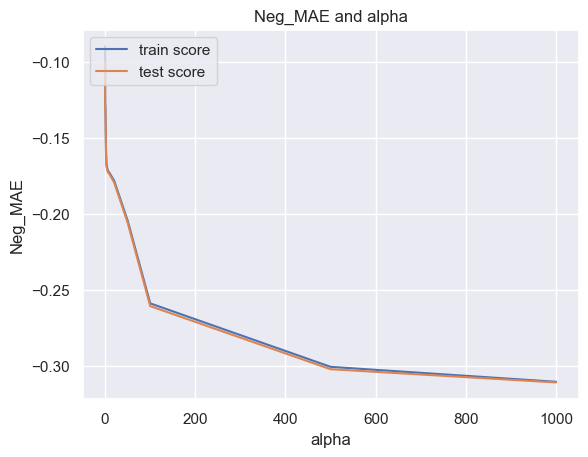

In [195]:
cv_results = pd.DataFrame(model_cv_l11.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
#cv_results = cv_results[cv_results['param_alpha']<=0.01]
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg_MAE')

plt.title("Neg_MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [198]:
#Lasso for optimal alpha in 'lasso_l11'
alpha = 0.0001
lasso_l11 = Lasso(alpha=alpha)
        
lasso_l11.fit(X_train, y_train) 

y_pred_train = lasso_l11.predict(X_train)
y_pred_test = lasso_l11.predict(X_test)


r2_train_l11 = r2_score(y_train, y_pred_train)
print(r2_train_l11)

r2_test_l11 = r2_score(y_test, y_pred_test)
print(r2_test_l11)

0.8958600535542747
0.75532120457495


In [199]:
lasso_l11.coef_

array([ 2.82492230e-02,  3.15577935e-06,  2.16192403e-01,  1.34007203e-02,
        1.65485333e-02, -4.32898350e-03,  0.00000000e+00,  2.21795498e-03,
       -7.82031893e-03,  9.31749738e-04,  4.09306545e-03,  1.07845084e-01,
        3.86080010e-05,  7.79901870e-02,  2.02189160e-03,  0.00000000e+00,
       -3.59546722e-03, -1.30443897e-03,  9.86327909e-04, -5.08110949e-03,
        2.48879443e-05, -7.29953090e-03, -6.52138903e-05,  5.40390025e-03,
        1.39326914e-02, -3.38045689e-02, -1.44657869e-02, -2.44584257e-03,
        1.37320335e-04, -4.40477125e-03,  1.27661432e-04,  3.44751521e-05,
        2.55641513e-05,  3.00394575e-02,  1.42260315e-02, -6.40657052e-02,
       -2.25679809e-03,  2.14786951e-04,  1.69503320e-04,  1.12134487e-04,
        2.03814348e-05,  9.36211961e-03, -1.20362359e-02,  3.26618248e-02,
        2.23400244e-02,  1.82194720e-03, -7.86265684e-02,  8.55706353e-03,
        7.10537352e-03,  3.82345520e-02,  2.30437569e-02, -4.93150482e-03,
       -7.96274276e-03, -

In [200]:
model_param = list(lasso_l11.coef_)
model_param.insert(0,lasso_l11.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(val) for val in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,MSZoning,11.133447,11.133447
3,Alley,0.216192,0.216192
66,Fence,-0.135522,0.135522
12,HouseStyle,0.107845,0.107845
47,KitchenQual,-0.078627,0.078627
14,YearRemodAdd,0.077990,0.077990
36,Electrical,-0.064066,0.064066
56,GarageQual,0.052750,0.052750
59,WoodDeckSF,-0.042772,0.042772
50,Fireplaces,0.038235,0.038235


### Ridge 

In [202]:
# Applying Ridge
ridge = Ridge()

# cross validation as model_cv_l22
folds = 5
model_cv_l22 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_l22.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

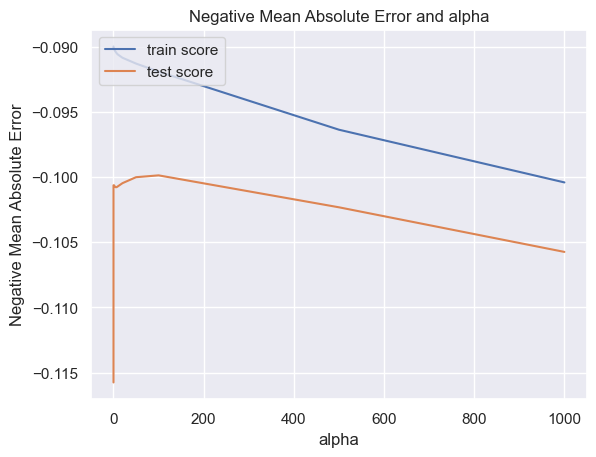

In [203]:
cv_results = pd.DataFrame(model_cv_l22.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [204]:
model_cv_l22.best_params_["alpha"]

100

In [205]:
#Ridge for optimal alpha in ridge_l22
alpha=100
ridge_l22 = Ridge(alpha=alpha)
        
ridge_l22.fit(X_train, y_train) 

y_pred_train = ridge_l22.predict(X_train)
y_pred_test = ridge_l22.predict(X_test)


r2_train_l22 = r2_score(y_train, y_pred_train)
print(r2_train_l22)

r2_test_l22 = r2_score(y_test, y_pred_test)
print(r2_test_l22)


0.8892321237232077
0.7756678988002076


In [206]:
ridge_l22.coef_

array([ 2.34819911e-02,  2.50921605e-06,  9.98655965e-03,  6.74493946e-03,
        1.61966078e-02, -4.67665367e-03,  6.19876827e-04,  1.23332860e-03,
       -4.33426357e-03,  1.20116724e-03,  7.61064900e-03,  4.95481971e-02,
       -2.21241492e-03,  7.16188754e-02,  2.24713018e-03,  2.23272056e-05,
        8.16636938e-04, -8.43063025e-04,  1.24749291e-03, -6.23912130e-03,
        3.81198343e-05, -1.08790679e-02, -3.69744100e-03,  6.76877355e-03,
        1.12346934e-02, -2.25583585e-02, -1.29627569e-02, -1.84945005e-03,
        7.84174790e-05, -2.88057070e-03,  5.53274283e-05, -2.55382014e-05,
        1.08206706e-04,  8.12709618e-03,  1.44130318e-02, -2.65285764e-02,
       -5.41249604e-03,  1.03767676e-04,  7.69047130e-05, -5.21664935e-05,
        1.28505895e-04,  5.32284470e-03, -4.75562787e-03,  1.19508329e-02,
        1.30290016e-02,  4.18540358e-03, -2.08574259e-02,  2.03447616e-03,
        7.35879515e-03,  3.05999701e-02,  1.64485795e-02, -1.06403615e-02,
       -1.13198319e-02,  

In [207]:
ridge_l22.intercept_

11.452002524800044

In [208]:
model_param = list(ridge_l22.coef_)
model_param.insert(0,ridge_l22.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param,(abs(val) for val in model_param))))
ridge_coef.columns = ['Feature','Coef','mod']
ridge_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,MSZoning,11.452003,11.452003
14,YearRemodAdd,0.071619,0.071619
12,HouseStyle,0.049548,0.049548
56,GarageQual,0.032622,0.032622
50,Fireplaces,0.030600,0.030600
36,Electrical,-0.026529,0.026529
1,LotArea,0.023482,0.023482
26,BsmtExposure,-0.022558,0.022558
59,WoodDeckSF,-0.021629,0.021629
47,KitchenQual,-0.020857,0.020857
